# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [14]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
apple= pd.read_csv(url)


print(apple.head())

         Date   Open   High    Low  Close    Volume  Adj Close
0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52


### Step 3. Assign it to a variable apple

In [31]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
apple= pd.read_csv(url)

### Step 4.  Check out the type of the columns

In [32]:
print(apple.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [33]:
apple['Date'] = pd.to_datetime(apple['Date'])
print(apple.head())

        Date   Open   High    Low  Close    Volume  Adj Close
0 2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1 2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2 2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3 2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4 2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52


### Step 6.  Set the date as the index

In [34]:
apple.set_index('Date' , inplace=True)



### Step 7.  Is there any duplicate dates?

In [26]:
duplicates = apple.index.duplicated()


if duplicates.any():
    print("duplicated")
    print(apple[duplicates])
else:
    print("no duplicated")

no duplicated


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [28]:
apple.sort_index(ascending=True, inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [38]:
last_business_day = apple.resample('M').last()

print(last_business_day.head())

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-31  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-31  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-28  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-31  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-30  28.38  28.62  28.38  28.38   3152800       0.44


C:\Users\DELL\AppData\Local\Temp\ipykernel_3944\2565385485.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_business_day = apple.resample('M').last()


### Step 10.  What is the difference in days between the first day and the oldest

In [39]:
first_day = apple.index[0]
oldest_day = apple.index[-1]


difference = (first_day - oldest_day).days


print(f"The difference in days between the first and the oldest day is: {difference} days")

The difference in days between the first and the oldest day is: 12261 days


### Step 11.  How many months in the data we have?

In [41]:
unique_months = apple.resample('M').first()


num_months = len(unique_months)


print(f"Number of months in the data: {num_months}")

Number of months in the data: 404


C:\Users\DELL\AppData\Local\Temp\ipykernel_3944\1507694642.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  unique_months = apple.resample('M').first()


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

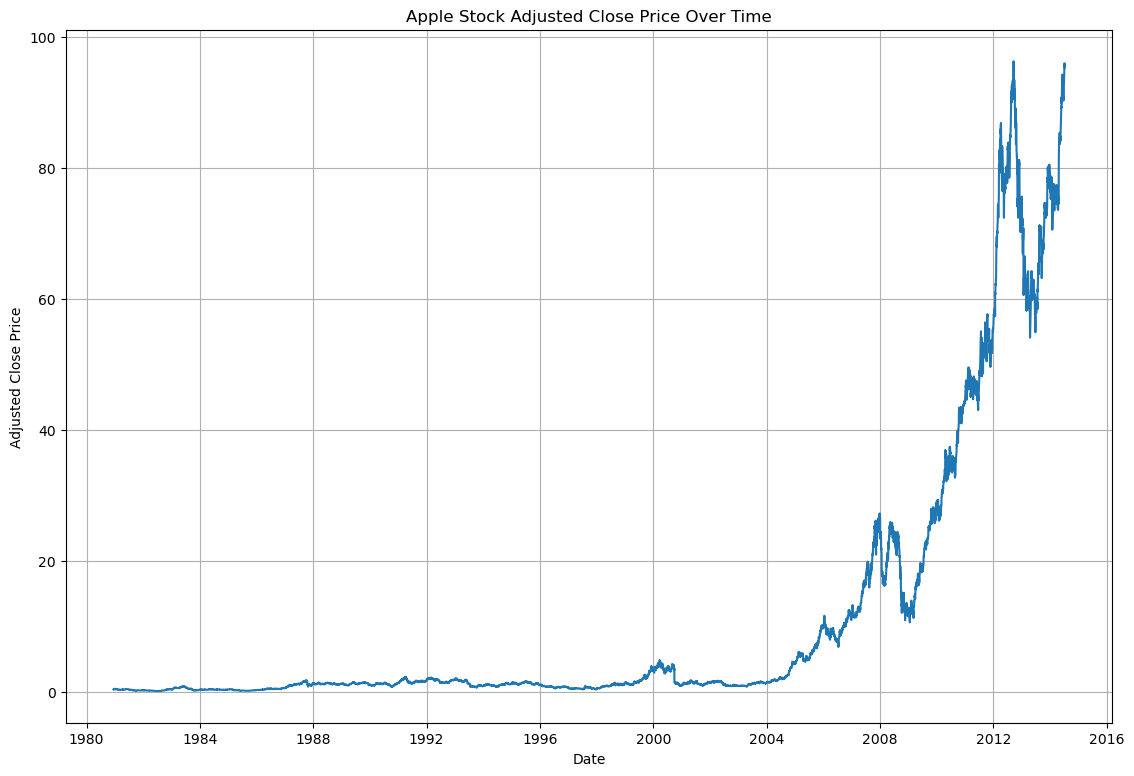

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5, 9))  # تعيين حجم الشك
plt.plot(apple['Adj Close'])
plt.title('Apple Stock Adjusted Close Price Over Time')  # إضافة عنوان للرسم
plt.xlabel('Date')  # تسمية المحور الأفقي
plt.ylabel('Adjusted Close Price')  # تسمية المحور الرأسي
plt.grid(True)  # إضافة شبكة
plt.show()

### BONUS: Create your own question and answer it.